In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm.auto import tqdm
from tabulate import tabulate

pd.set_option('display.max_columns', None)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_excel(r"C:\.vscode\drone Attacks\GPS_Data_Simplified_2D_Feature_Map.xlsx")
df.head()

,PRN,DO,PD,RX,TOW,CP,EC,LC,PC,PIP,PQP,TCD,CN0,Output
0,6,1160.671408,-238359.543282,491568.00,491568.000795,-24660.263293,163521.78,170008.81,179294.97,178420.33,-17688.17800,1158.4806,49.412529,0
1,6,1157.827808,-238363.921192,491568.02,491568.020795,-24683.468520,158277.05,160253.09,182106.11,182106.05,158.33333,1160.7948,49.452686,0
2,6,1161.135932,-238368.638615,491568.04,491568.040795,-24706.687357,184442.36,193125.89,208228.02,-205198.30,35391.59000,1157.6909,49.480145,0
3,6,1161.156617,-238373.391775,491568.06,491568.060795,-24729.920039,159812.45,169960.55,187550.72,187543.00,-1701.94400,1161.1343,49.433769,0
4,6,1160.690893,-238378.127066,491568.08,491568.080795,-24753.153999,183557.66,191912.58,208403.50,208330.05,-5532.89990,1161.1759,49.391670,0


In [16]:

# def a function to check the dataset information
def dataset_info(df):
    num_rows = df.shape[0]
    num_columns = df.shape[1]
    column_names = df.columns.tolist()
    data_types = df.dtypes.value_counts()

    # Print the statistics
    print(f"Total rows: {num_rows}\n")
    print(f"Total columns: {num_columns}\n")
    print(f"Column names: {column_names}\n")
    print("Data types:")
    print(data_types)

In [17]:

# check the statistics of dataset
dataset_info(df)


Total rows: 510530

Total columns: 14

Column names: ['PRN', 'DO', 'PD', 'RX', 'TOW', 'CP', 'EC', 'LC', 'PC', 'PIP', 'PQP', 'TCD', 'CN0', 'Output']

Data types:
float64    12
int64       2
Name: count, dtype: int64


In [18]:

missing = (df.isnull().mean()) > 0
missing_values_count = df.isnull().sum()[missing]

if len(missing_values_count)!=0:
  missing_values_percentage = ((df.isnull().sum() / len(df)) * 100)[missing]

  missing_values_info = pd.DataFrame({
      'Missing Count': missing_values_count,
      'Missing Percentage': missing_values_percentage
  })
  missing_values_info = missing_values_info.sort_values(by='Missing Count', ascending=False)
  print(missing_values_info)

  # visualization of nullity of the dataset
  sns.heatmap(df[missing_values_info.index.tolist()].isnull())
else:
  print("No Null values exist in dataset.")

No Null values exist in dataset.


In [19]:
def target_distribution(df_final, col):
    plt.figure(figsize=(17, 7))

    plt.subplot(1, 2, 1)

    ax = df_final[col].map({0:'Authentic GPS signals', 1:'spoofed signals 1', 2:'spoofed signals 2',3:'spoofed signals 3'}).value_counts().plot(kind = 'bar', color = ['green', 'red', 'red'])

    plt.xlabel('Target Category', fontsize=16)
    plt.ylabel('Frequency of Target', fontsize=16)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.title('Frequency Distribution of Target', fontsize=18)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01), size=15)


    plt.subplot(1,2,2)

    df_final[col].map({0:'Authentic GPS signals', 1:'spoofed signals 1', 2:'spoofed signals 2', 3:'spoofed signals 3'}).value_counts().plot.pie(explode=[0.1,0.09, 0.09, 0.09],autopct='%1.2f%%',shadow=True, colors = ['green', 'red', 'red'],
                                        textprops={'fontsize':15, 'color':'white'})
    plt.ylabel('target', fontsize=16)
    plt.title('Proportional Distribution of Target', fontsize=18)
    plt.legend()
    plt.show()

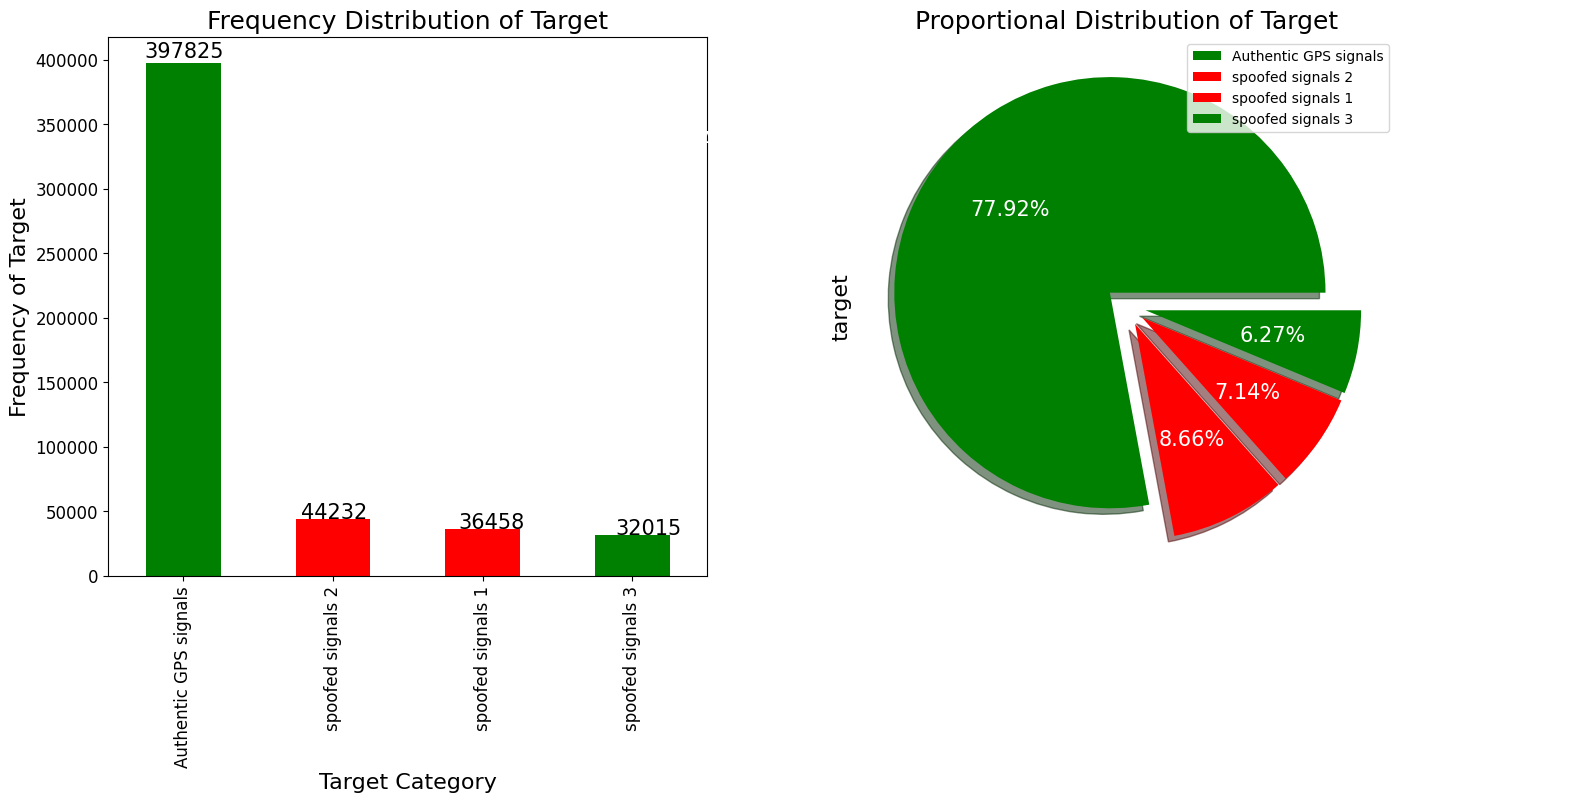

In [20]:
target_distribution(df, 'Output')

In [21]:
def plot_num_var(LC_data,colname,name):
    # Visualizing our dependent variable and Skewness
    fig , (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    fig.set_facecolor("lightgrey")

    font_family = 'sans-serif'
    sns.boxplot(y= colname,x='Output',data=LC_data,ax=ax1)
    ax1.set_ylabel(name, fontsize=14,family = font_family)
    ax1.set_xlabel('Output', fontsize=14,family = font_family, fontweight="bold")
    ax1.set_title(name + ' by target', fontweight="bold",fontsize=15,family = font_family)
    # Set the x-axis ticks (labels) with rotation
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

    sns.distplot(LC_data[colname],color='y',ax=ax2,kde=True)

    mean = np.mean(LC_data[colname].dropna().tolist())
    median = LC_data[colname].median()
    mode = LC_data[colname].mode()[0]

    label_mean= ("Mean :  {:.2f}".format(mean))
    label_median = ("Median :  {:.2f}".format(median))
    label_mode = ("Mode :  {:.2f}".format(mode))

    ax2.set_title("Distribution of " + name, fontweight="bold",fontsize=15,family = font_family)
    ax2.set_ylabel('Density', fontsize=12,family = font_family)
    ax2.set_xlabel(name, fontsize=12,family = font_family)
    ax2.axvline(mean,color="g",label=label_mean)
    ax2.axvline(median,color="b",label=label_median)
    ax2.axvline(mode,color="r",label=label_mode)
    ax2.legend()
    plt.savefig(f"{name}.png", bbox_inches='tight')
    plt.show()


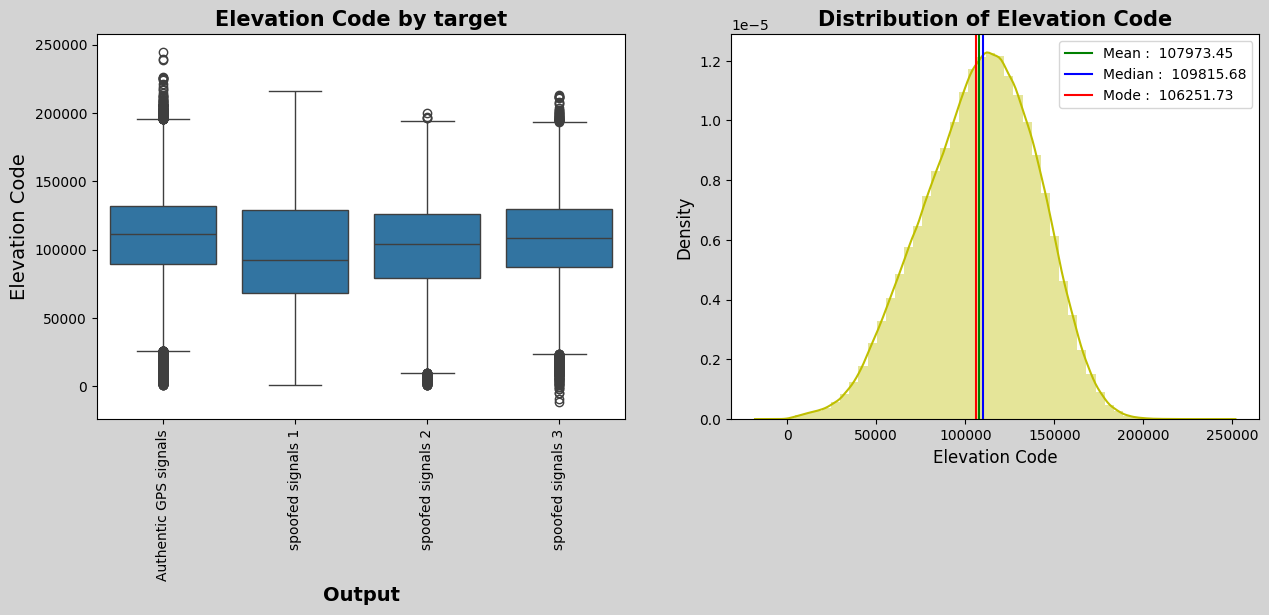

In [22]:
df1 = df.copy()
df1['Output'] = df1['Output'].map({0:'Authentic GPS signals', 1:'spoofed signals 1', 2:'spoofed signals 2',3:'spoofed signals 3'})
plot_num_var(df1,'EC','Elevation Code')

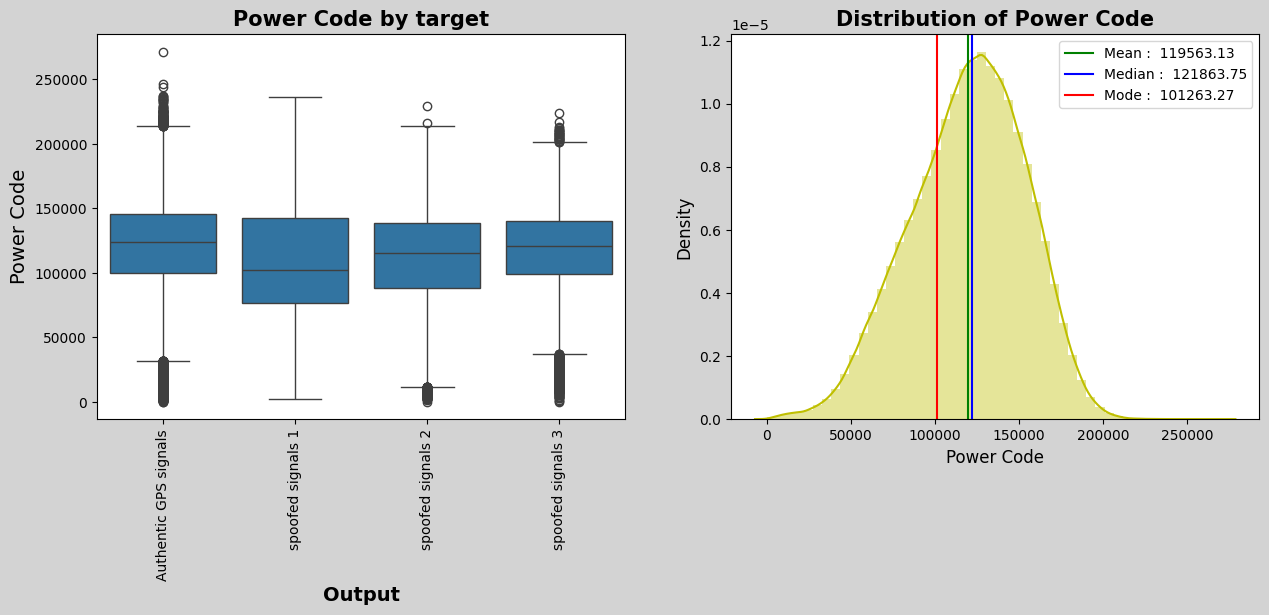

In [23]:
plot_num_var(df1,'PC','Power Code')

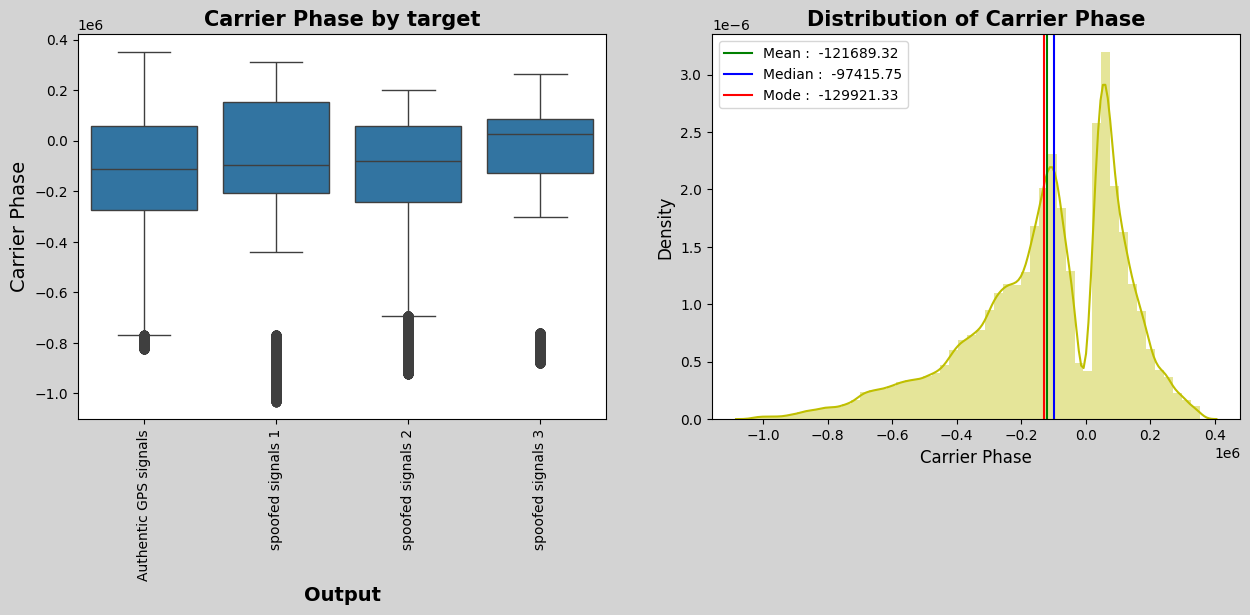

In [24]:

plot_num_var(df1,'CP','Carrier Phase')

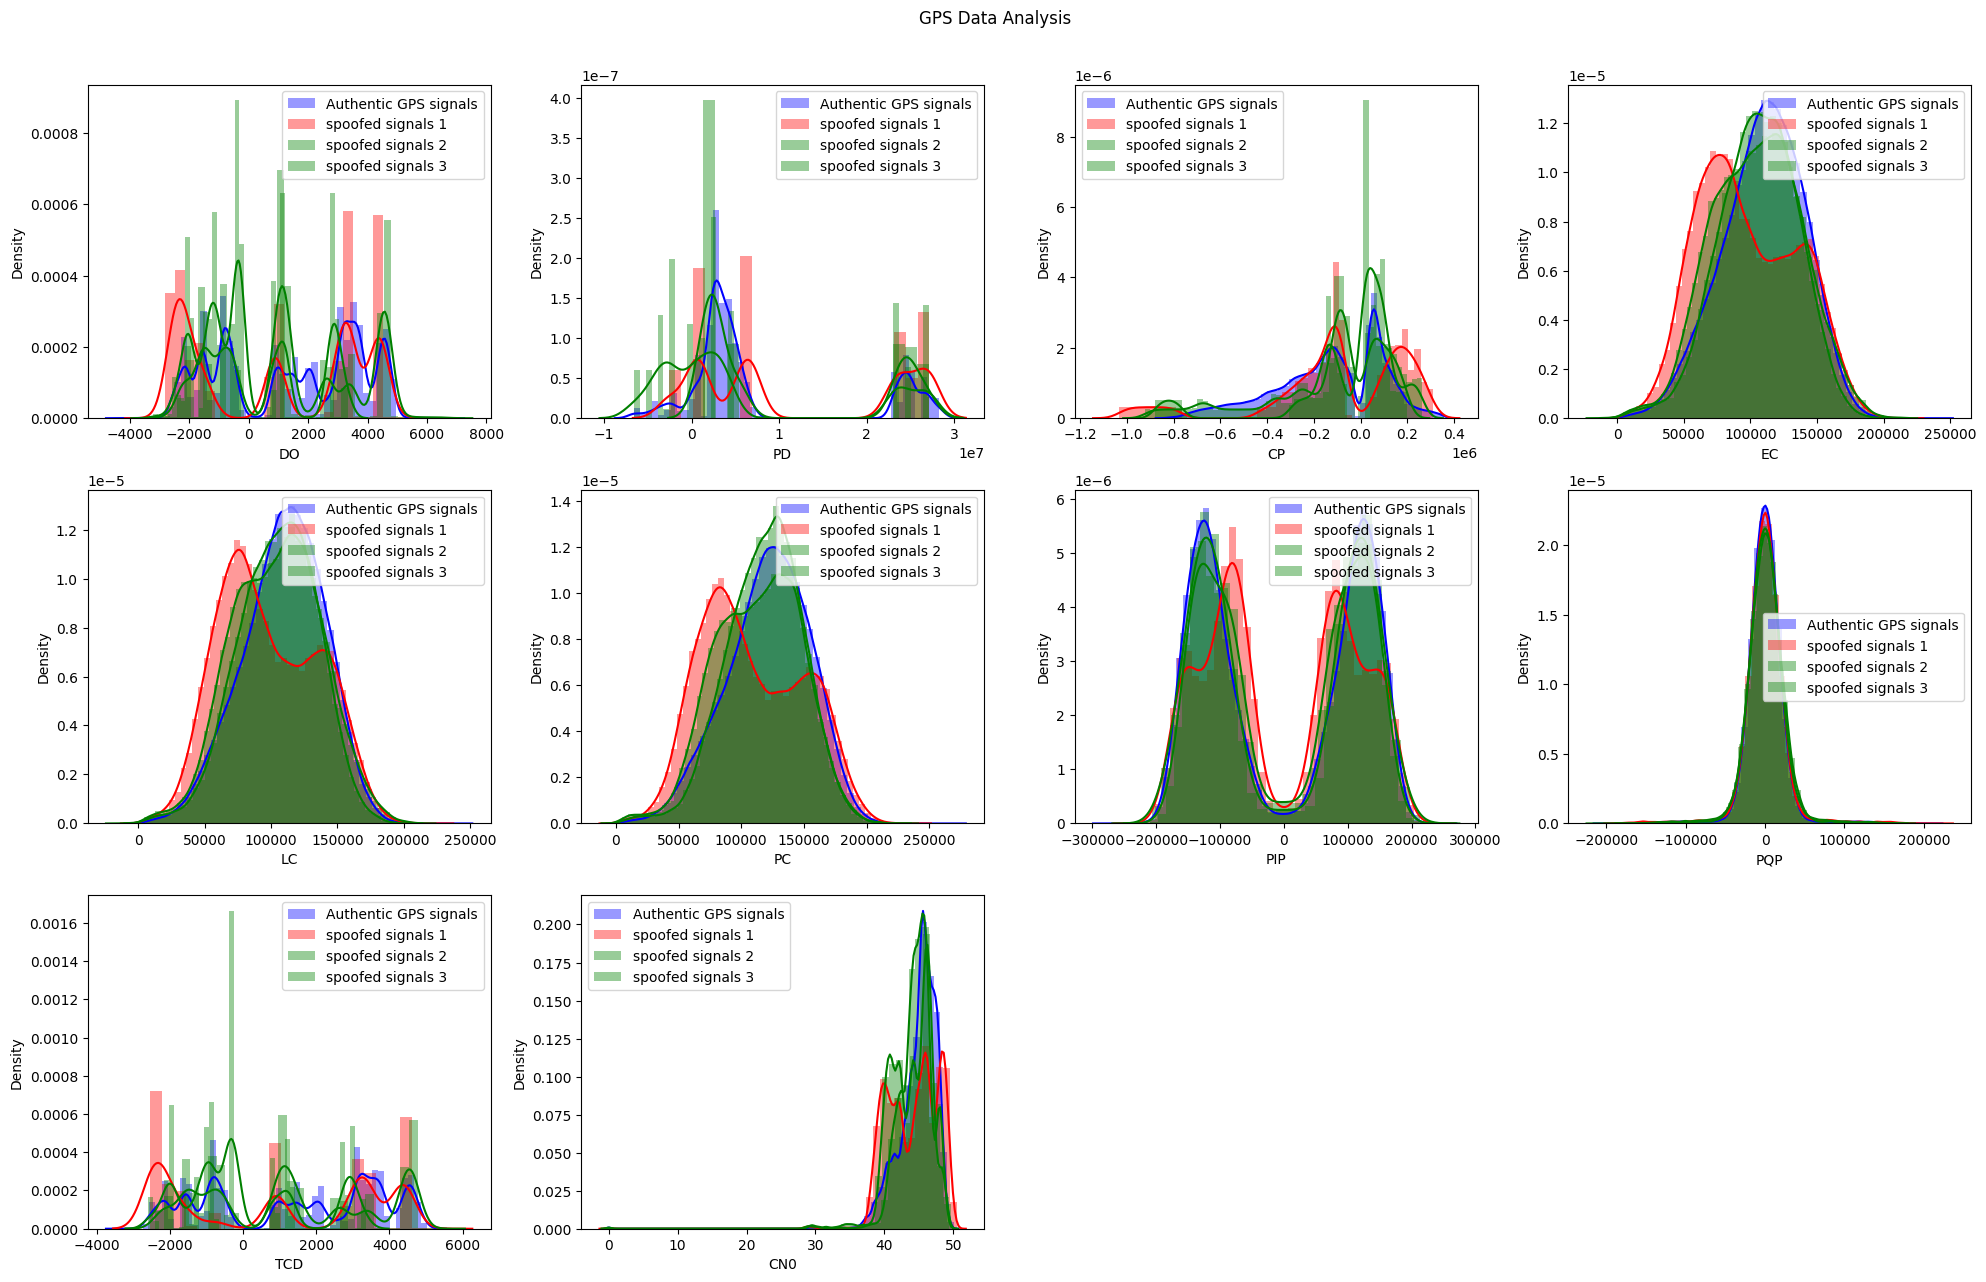

In [25]:
fig = plt.figure(figsize = (20, 25))
j = 0
num_clinical_columns= ['DO', 'PD','CP', 'EC', 'LC', 'PC', 'PIP', 'PQP',
       'TCD', 'CN0']
for i in df[num_clinical_columns].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df[i][df['Output']==0], color='b', label = 'Authentic GPS signals')
    sns.distplot(df[i][df['Output']==1], color='r', label = 'spoofed signals 1')
    sns.distplot(df[i][df['Output']==2], color='g', label = 'spoofed signals 2')
    sns.distplot(df[i][df['Output']==3], color='g', label = 'spoofed signals 3')


    plt.legend(loc='best')
fig.suptitle('GPS Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

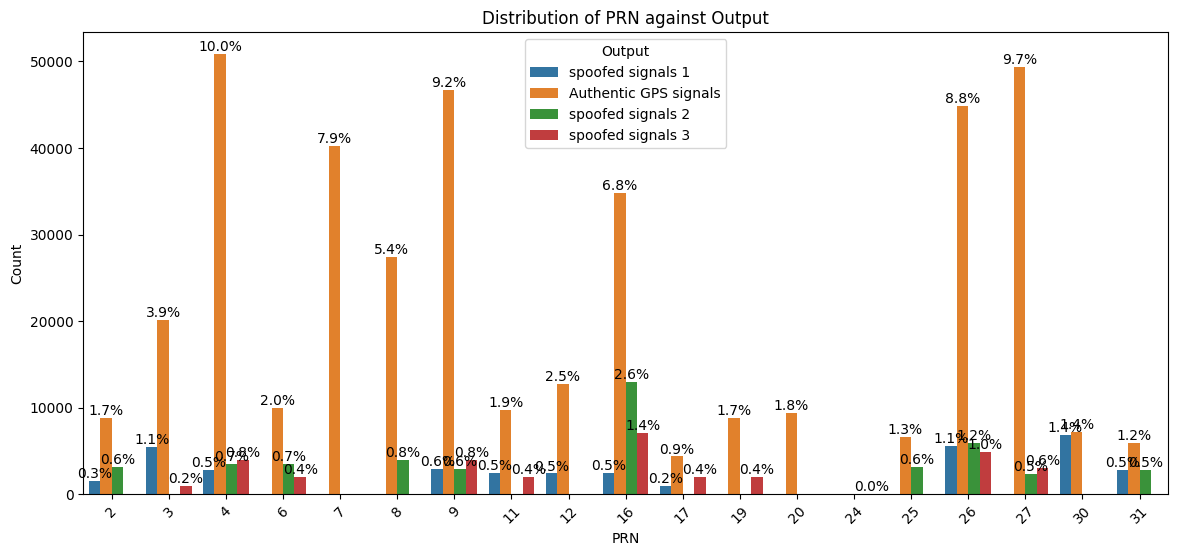

In [26]:

# Check the distribution of PRN against Output
feature = 'PRN'
categorical_output = 'Output'

plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df1, x=feature, hue=categorical_output)
plt.title(f'Distribution of {feature} against {categorical_output}')
plt.xlabel(feature)
plt.ylabel('Count')
plt.legend(title=categorical_output)
plt.xticks(rotation=45)

# Add percentage labels to the y-axis
total_counts = len(df1)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total_counts
    if percentage > 0:
        ax.annotate(f'{percentage:.1%}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)
plt.show()


In [27]:

df.head()


,PRN,DO,PD,RX,TOW,CP,EC,LC,PC,PIP,PQP,TCD,CN0,Output
0,6,1160.671408,-238359.543282,491568.00,491568.000795,-24660.263293,163521.78,170008.81,179294.97,178420.33,-17688.17800,1158.4806,49.412529,0
1,6,1157.827808,-238363.921192,491568.02,491568.020795,-24683.468520,158277.05,160253.09,182106.11,182106.05,158.33333,1160.7948,49.452686,0
2,6,1161.135932,-238368.638615,491568.04,491568.040795,-24706.687357,184442.36,193125.89,208228.02,-205198.30,35391.59000,1157.6909,49.480145,0
3,6,1161.156617,-238373.391775,491568.06,491568.060795,-24729.920039,159812.45,169960.55,187550.72,187543.00,-1701.94400,1161.1343,49.433769,0
4,6,1160.690893,-238378.127066,491568.08,491568.080795,-24753.153999,183557.66,191912.58,208403.50,208330.05,-5532.89990,1161.1759,49.391670,0


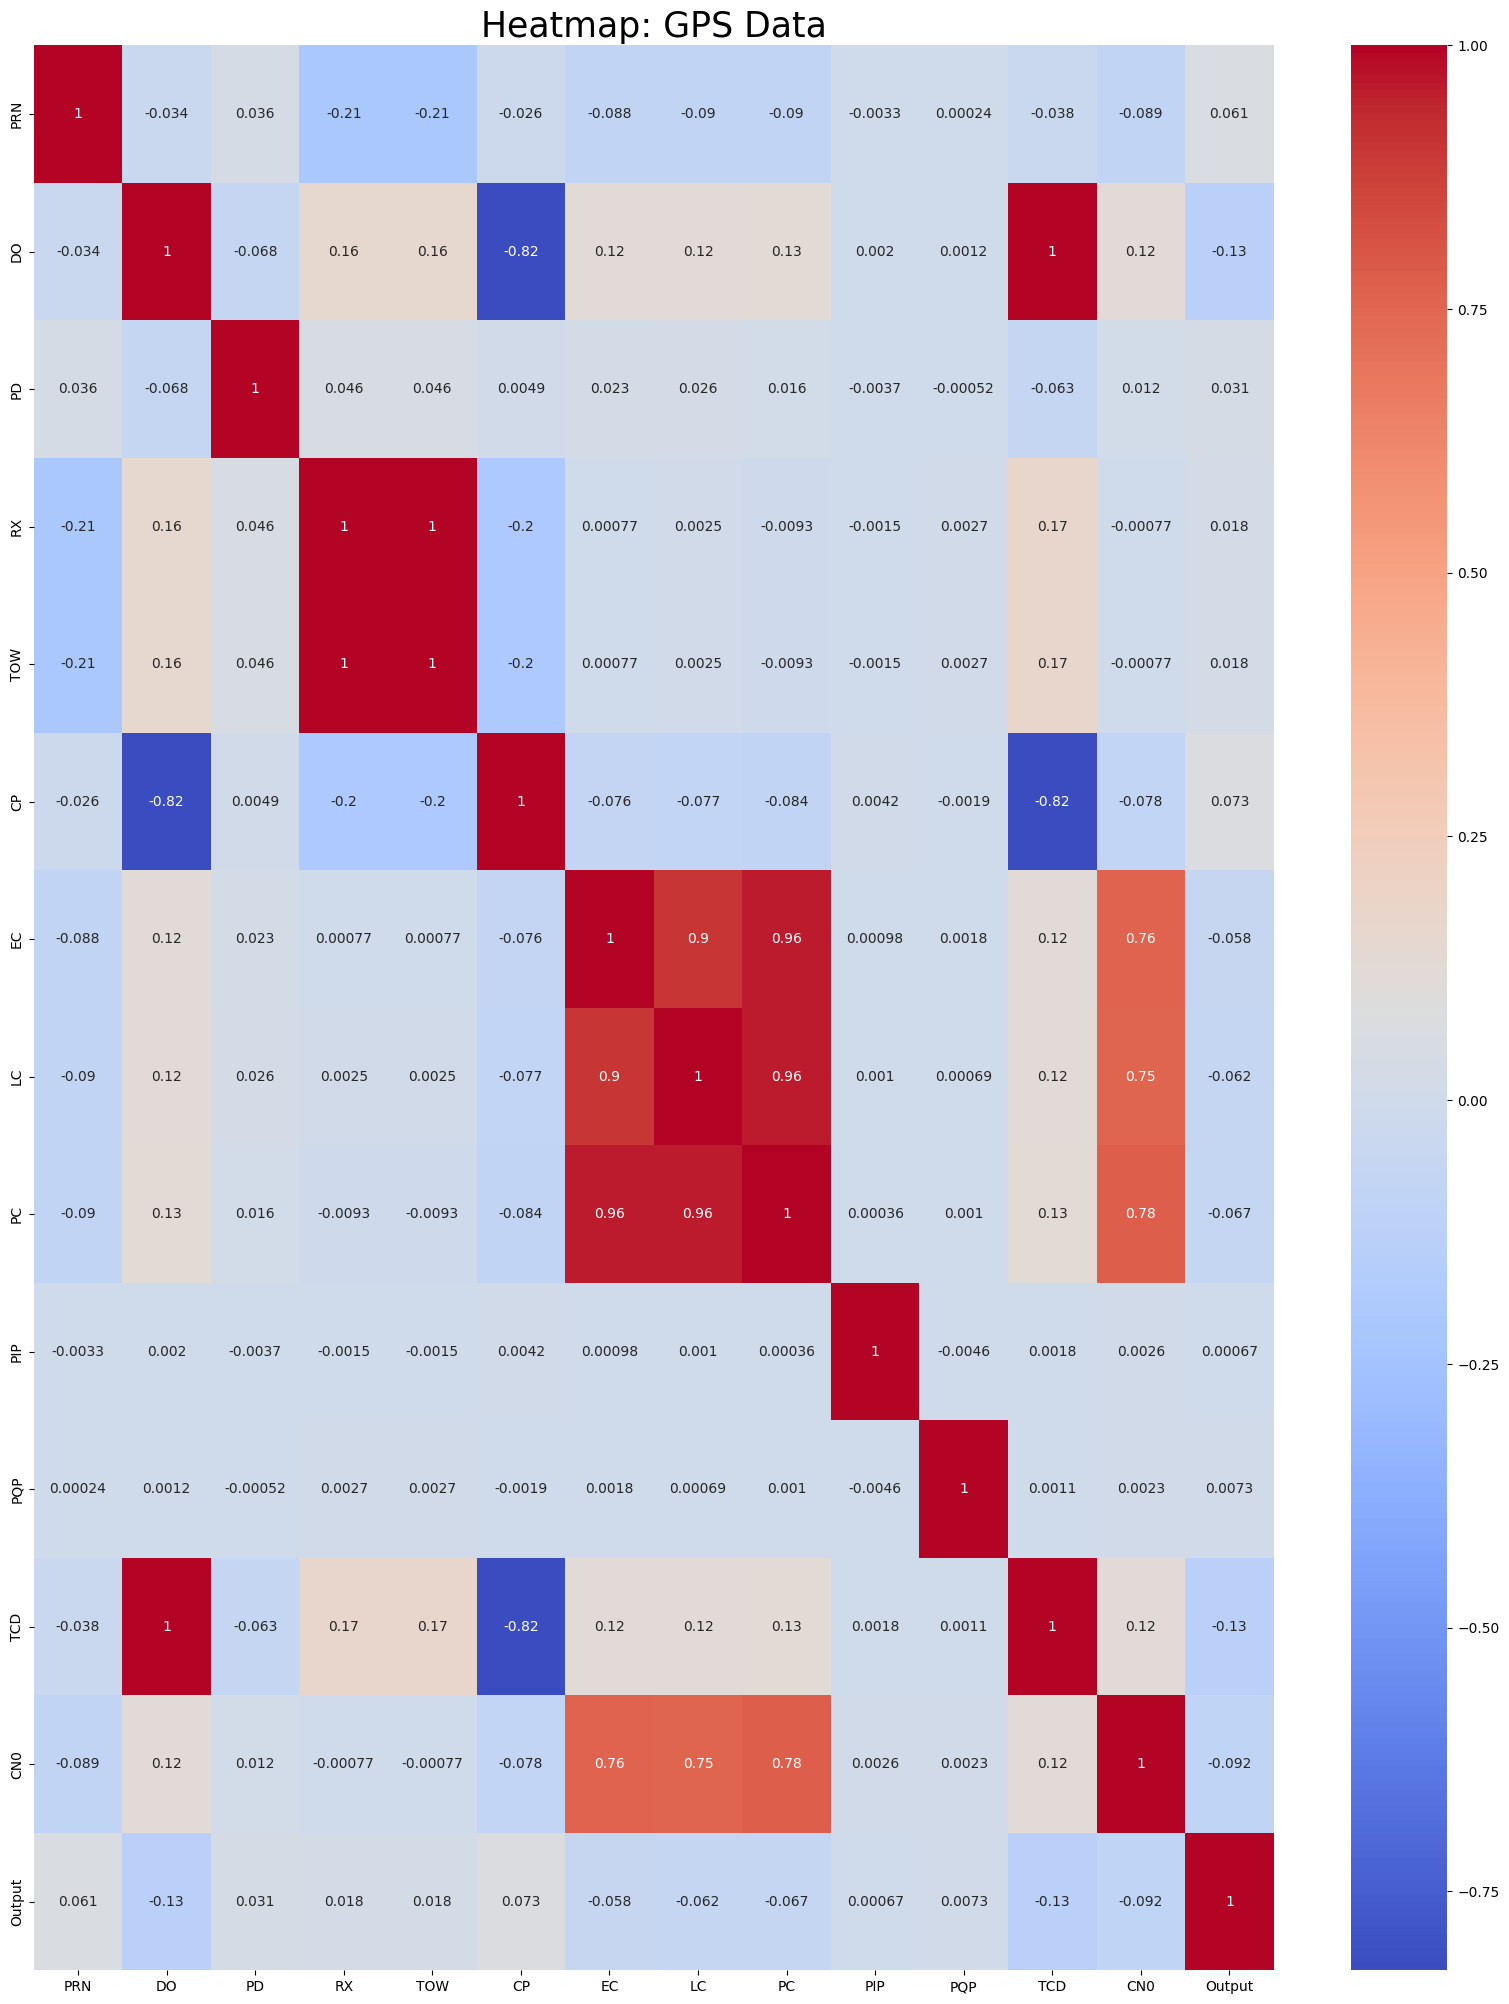

In [28]:

# creates a heatmap of the correlation matrix of a pandas DataFrame
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title("Heatmap: GPS Data", fontsize=25)
plt.show()

In [29]:
def check_correlation(df):
  # Calculate the correlation matrix
  correlation_matrix = df.corr()[['Output']].sort_values(by='Output', ascending=False)

  # Rename the correlation column to 'Correlation with Energy Usage'
  correlation_matrix = correlation_matrix.rename(columns={'Output': 'Correlation with Output'})

  # Display the correlation matrix as a table
  print("Correlation Matrix:")
  print(correlation_matrix)
  return correlation_matrix

In [30]:
correlation_matrix = check_correlation(df)

Correlation Matrix:
        Correlation with Output
Output                 1.000000
CP                     0.073355
PRN                    0.060742
PD                     0.031344
TOW                    0.017606
RX                     0.017606
PQP                    0.007277
PIP                    0.000670
EC                    -0.057889
LC                    -0.062232
PC                    -0.066992
CN0                   -0.091590
TCD                   -0.128014
DO                    -0.130943


In [31]:
from scipy.stats import f_oneway

def check_feature_association_through_ANOVA_test(df, input_feature_list, output_feature):
  association_featues = []
  for i in input_feature_list:
      # Split data based on unique values of the output feature
      output_categories = df[output_feature].unique()
      data_groups = [df[df[output_feature] == category][i] for category in output_categories]

      # Perform ANOVA test
      statistic, p_value = f_oneway(*data_groups)


      # Check if the p-value is below your significance level (e.g., 0.05) to determine significance
      if p_value < 0.05:
          association_featues.append(i)
          print(f"✅ There is a significant association between the features ({i} and {output_feature}).")
      else:
          print()
          print(f"❌ There is no significant association between the features ({i} and {output_feature}).")

      # Print the results
      print(f"ANOVA Statistic: {statistic}")
      print(f"P-value: {p_value}")
      print()

  return association_featues

In [32]:

features = ['DO', 'PD', 'RX', 'TOW', 'CP', 'EC', 'LC', 'PC', 'PIP', 'PQP',
       'TCD', 'CN0']

In [33]:
association_featues = check_feature_association_through_ANOVA_test(df, features, 'Output')



✅ There is a significant association between the features (DO and Output).
ANOVA Statistic: 4111.082978152244
P-value: 0.0

✅ There is a significant association between the features (PD and Output).
ANOVA Statistic: 3095.0114560494712
P-value: 0.0

✅ There is a significant association between the features (RX and Output).
ANOVA Statistic: 1553.4488735111772
P-value: 0.0

✅ There is a significant association between the features (TOW and Output).
ANOVA Statistic: 1553.4480796753444
P-value: 0.0

✅ There is a significant association between the features (CP and Output).
ANOVA Statistic: 1637.536426166284
P-value: 0.0

✅ There is a significant association between the features (EC and Output).
ANOVA Statistic: 2054.3456582308195
P-value: 0.0

✅ There is a significant association between the features (LC and Output).
ANOVA Statistic: 2091.3990256859693
P-value: 0.0

✅ There is a significant association between the features (PC and Output).
ANOVA Statistic: 2208.355991317922
P-value: 0.0

✅ 

In [34]:
association_featues

['DO', 'PD', 'RX', 'TOW', 'CP', 'EC', 'LC', 'PC', 'PIP', 'PQP', 'TCD', 'CN0']

In [35]:
df_copy = df[['PRN']+association_featues+['Output']]

In [36]:

# lets extract the dependent and independent features
X = df_copy.drop('Output', axis=1)
y = df_copy['Output']

In [37]:
import random
np.random.seed(42)
random.seed(42)

In [38]:
def splitting_dataset(X, y, test_size=0.20):
    from sklearn.model_selection import train_test_split

    assert X.shape[0] == y.shape[0], "Number of samples in X and y should be the same."

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    # Check the shape of training and testing sets
    print("Training shape:", X_train.shape)
    print("Testing shape:", X_test.shape)

    return X_train, X_test, y_train, y_test

In [39]:

# lets split the dataset stratified
X_train, X_test, y_train, y_test = splitting_dataset(X, y , test_size=0.2)


Training shape: (408424, 13)
Testing shape: (102106, 13)


In [40]:

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [41]:

X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns = X_train.columns)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import time
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib


In [43]:
def results(model, y_pred, y_test,y_pred_train,y_train, classes, multi_class=False):
    if multi_class:
        accuracy = round(accuracy_score(y_pred, y_test)*100,2)
        train_accuracy = round(accuracy_score(y_pred_train, y_train)*100,2)
        precision = round(precision_score(y_pred, y_test, average='macro')*100,2)
        recall = round(recall_score(y_pred, y_test, average='macro')*100,2)
        f1_scr = round(f1_score(y_pred, y_test, average='macro')*100,2)
    else:
        accuracy = round(accuracy_score(y_pred, y_test)*100,2)
        train_accuracy = round(accuracy_score(y_pred_train, y_train)*100,2)
        precision = round(precision_score(y_pred, y_test)*100,2)
        recall = round(recall_score(y_pred, y_test)*100,2)
        f1_scr = round(f1_score(y_pred, y_test)*100,2)


    print("\nTraining Accuracy: {}%".format(train_accuracy))
    print("Testing Accuracy: {}%".format(accuracy))
    print("Precision: {}%".format(precision))
    print("Recall: {}%".format(recall))
    print("F1-Score: {}%".format(f1_scr))
    print()
    print("Classification Report:")
    print(classification_report(y_pred, y_test, target_names=classes))
    print()
    print("Confusion Matrix:")
    fig, ax = plt.subplots(figsize=(7,5))
    ConfusionMatrixDisplay.from_predictions(y_pred, y_test,
                                            ax=ax,
                                            display_labels=classes,
                                            xticks_rotation='vertical')
    plt.show()

    return {
        'Model':model.__class__.__name__,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1_scr
    }

In [44]:
def train_model(model, X_train, y_train, X_test, y_test, labelEncoder, multi_class=False):
    import time
    from tensorflow.keras.models import save_model

    # Record the start time
    start_time = time.time()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Record the end time
    end_time = time.time()

    # Compute the training time in seconds
    training_time = end_time - start_time
    print(f"Training time: {training_time:.3f} seconds")

    # Predict the model on testing data
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Get results
    RESULTS_LR = results(model, y_pred, y_test, y_pred_train, y_train, labelEncoder, multi_class)

    # Add the training time to RESULTS_LR
    RESULTS_LR["Training time (s)"] = training_time

    
    import joblib

# Save the trained model
    model_filename = "gps_spoofing_model.pkl"
    joblib.dump(model, model_filename)
    print(f"Model saved as {model_filename}")

    

    return RESULTS_LR, model


In [45]:
def get_model_results(res):
  # Convert the dictionary to a DataFrame
  return pd.DataFrame.from_dict([res]).set_index('Model')

In [46]:
MODELS = {
    'RANDOM FOREST MODEL': RandomForestClassifier(),
    'LOGISTIC REGRESSION MODEL': LogisticRegression(),
    # 'SVM MODEL': SVC(),
    'DECISION TREE MODEL': DecisionTreeClassifier(),
    'XGBOOST MODEL': XGBClassifier()
}

####################################################################################################
				 RANDOM FOREST MODEL
####################################################################################################
Training time: 198.966 seconds

Training Accuracy: 99.25%
Testing Accuracy: 89.87%
Precision: 79.6%
Recall: 79.8%
F1-Score: 79.7%

Classification Report:
                       precision    recall  f1-score   support

Authentic GPS signals       0.95      0.95      0.95     79726
    spoofed signals 1       0.74      0.74      0.74      7271
    spoofed signals 2       0.57      0.58      0.58      8704
    spoofed signals 3       0.92      0.92      0.92      6405

             accuracy                           0.90    102106
            macro avg       0.80      0.80      0.80    102106
         weighted avg       0.90      0.90      0.90    102106


Confusion Matrix:


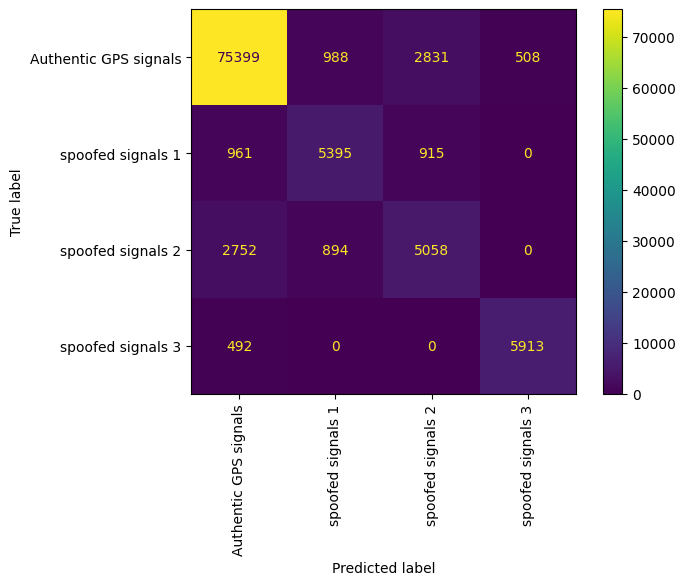

Model saved as gps_spoofing_model.pkl
Model saved as random_forest_model_gps_spoofing_model.pkl
####################################################################################################
				 LOGISTIC REGRESSION MODEL
####################################################################################################
Training time: 7.892 seconds

Training Accuracy: 77.88%
Testing Accuracy: 77.92%
Precision: 25.0%
Recall: 27.21%
F1-Score: 21.93%

Classification Report:
                       precision    recall  f1-score   support

Authentic GPS signals       1.00      0.78      0.88    102047
    spoofed signals 1       0.00      0.00      0.00         0
    spoofed signals 2       0.00      0.06      0.00        51
    spoofed signals 3       0.00      0.25      0.00         8

             accuracy                           0.78    102106
            macro avg       0.25      0.27      0.22    102106
         weighted avg       1.00      0.78      0.88    102106


Confusion

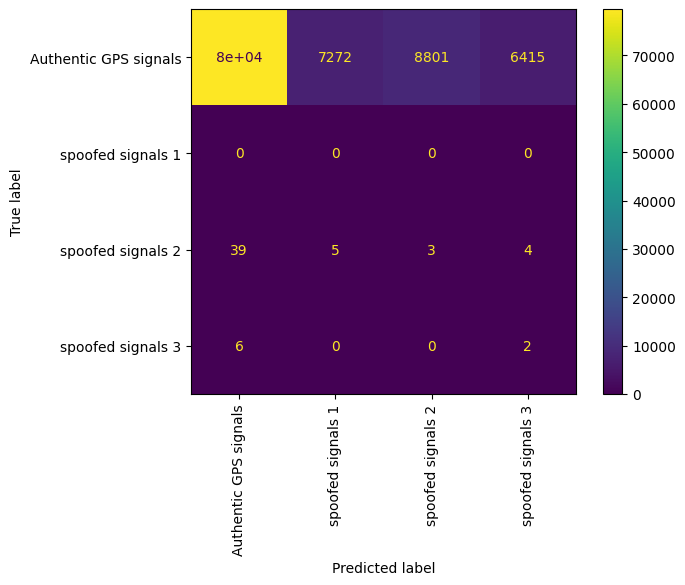

Model saved as gps_spoofing_model.pkl
Model saved as logistic_regression_model_gps_spoofing_model.pkl
####################################################################################################
				 DECISION TREE MODEL
####################################################################################################
Training time: 18.819 seconds

Training Accuracy: 99.25%
Testing Accuracy: 91.96%
Precision: 84.04%
Recall: 84.53%
F1-Score: 84.28%

Classification Report:
                       precision    recall  f1-score   support

Authentic GPS signals       0.96      0.95      0.96     79779
    spoofed signals 1       0.81      0.82      0.81      7202
    spoofed signals 2       0.68      0.68      0.68      8788
    spoofed signals 3       0.92      0.93      0.93      6337

             accuracy                           0.92    102106
            macro avg       0.84      0.85      0.84    102106
         weighted avg       0.92      0.92      0.92    102106


Confusi

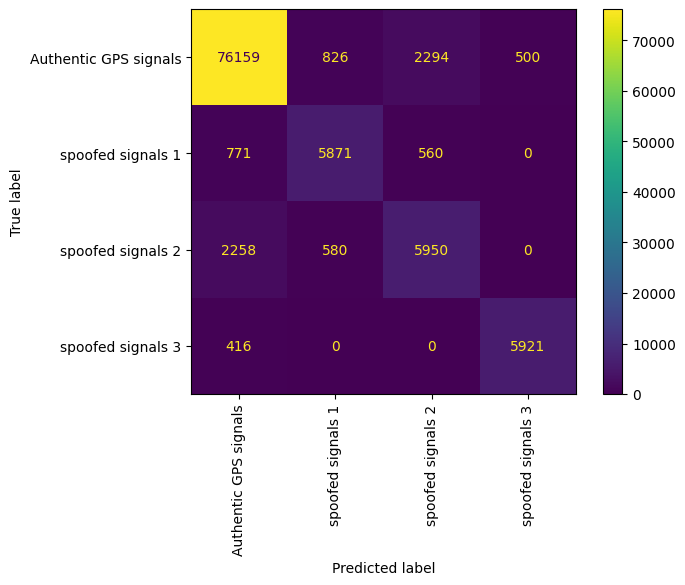

Model saved as gps_spoofing_model.pkl
Model saved as decision_tree_model_gps_spoofing_model.pkl
####################################################################################################
				 XGBOOST MODEL
####################################################################################################
Training time: 9.823 seconds

Training Accuracy: 94.93%
Testing Accuracy: 92.71%
Precision: 84.64%
Recall: 86.05%
F1-Score: 85.32%

Classification Report:
                       precision    recall  f1-score   support

Authentic GPS signals       0.96      0.96      0.96     80154
    spoofed signals 1       0.78      0.84      0.81      6836
    spoofed signals 2       0.70      0.71      0.71      8749
    spoofed signals 3       0.93      0.94      0.94      6367

             accuracy                           0.93    102106
            macro avg       0.85      0.86      0.85    102106
         weighted avg       0.93      0.93      0.93    102106


Confusion Matrix:


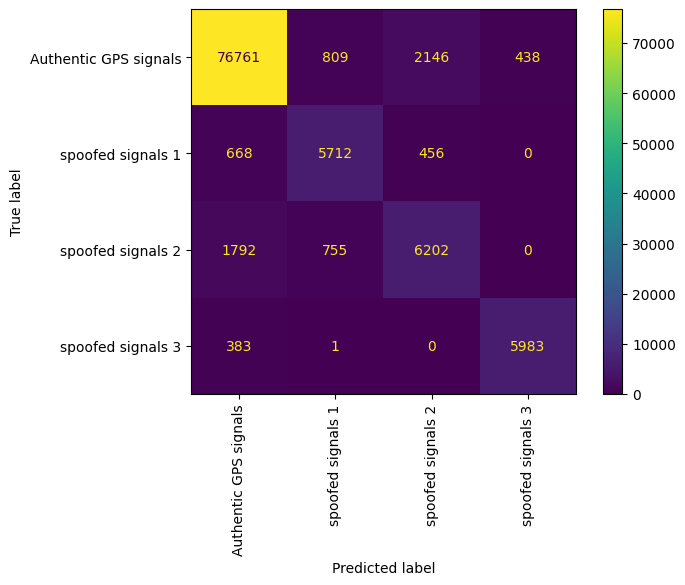

Model saved as gps_spoofing_model.pkl
Model saved as xgboost_model_gps_spoofing_model.pkl


In [47]:
import joblib

classes = ['Authentic GPS signals', 'spoofed signals 1',
           'spoofed signals 2', 'spoofed signals 3']
RES = []

for model_name, model in MODELS.items():
    print("#" * 100)
    print(f"\t\t\t\t {model_name}")
    print("#" * 100)
    
    res, trained_model = train_model(model, X_train_std, y_train, X_test_std, y_test, classes, multi_class=True)
    
    # Save each trained model using joblib
    model_filename = f"{model_name.replace(' ', '_').lower()}_gps_spoofing_model.pkl"
    joblib.dump(trained_model, model_filename)
    print(f"Model saved as {model_filename}")
    
    df_results_dt = get_model_results(res)
    RES.append(df_results_dt)


In [48]:

df_all_models = pd.concat(RES)
models_pd_ = df_all_models.reset_index()
models_pd_

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1,Training time (s)
0,RandomForestClassifier,99.25,89.87,79.60,79.80,79.70,198.965587
1,LogisticRegression,77.88,77.92,25.00,27.21,21.93,7.891680
2,DecisionTreeClassifier,99.25,91.96,84.04,84.53,84.28,18.819055
3,XGBClassifier,94.93,92.71,84.64,86.05,85.32,9.822977


In [49]:
def plot_performance_metrics_graph(df):
    df.T.plot(kind='bar', figsize=(15,5))
    plt.ylabel('Scores',fontsize=18)
    plt.xlabel('Models',fontsize=18)
    plt.legend(ncol=6, bbox_to_anchor=(1,1.15))
    plt.show()


In [50]:
def plot_accuracy(RESULTS):
    # Plot the R2 scores for testing and training data
    plt.figure(figsize=(10, 6))
    x = range(len(RESULTS.index))
    bar_width = 0.35

    plt.bar(x, RESULTS['Testing Accuracy'], width=bar_width, label='Testing Score')
    plt.bar([i + bar_width for i in x], RESULTS['Training Accuracy'], width=bar_width, label='Training Score')

    plt.xlabel('Model')
    plt.ylabel('R2 Score')
    plt.title('R2 Score Comparison for Testing and Training Data')
    plt.xticks([i + bar_width/2 for i in x], RESULTS.index, rotation=45, ha='right')
    plt.legend()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    for i in x:
        plt.text(i - 0.06, RESULTS['Testing Accuracy'][i] + 0.005, f"{RESULTS['Testing Accuracy'][i]:.2f}", color='black')
        plt.text(i + bar_width - 0.06, RESULTS['Training Accuracy'][i] + 0.005, f"{RESULTS['Training Accuracy'][i]:.2f}", color='black')

    plt.tight_layout()
    plt.show()

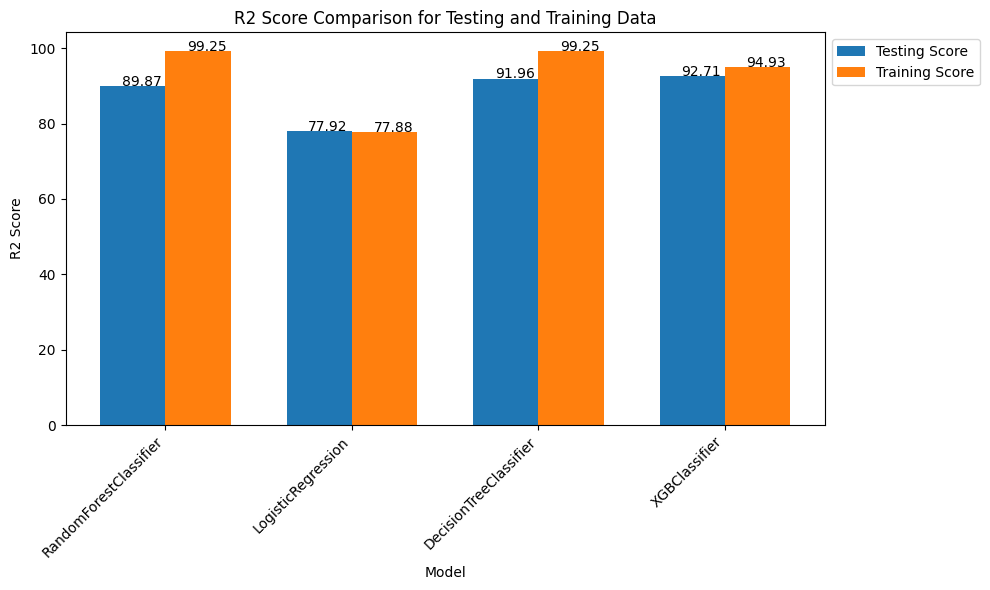

In [51]:
plot_accuracy(models_pd_.set_index("Model"))